In [1]:
#imports
import numpy
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.callbacks import ModelCheckpoint

from IPython.display import clear_output
import time
import os

In [2]:
#dataset is a tarfile
#Loading in dataset for use
import tarfile
file_name = 'fer2013.tar.gz'
if file_name.endswith("tar.gz"):
    tar = tarfile.open(file_name, "r:gz")
    tar.extractall()
    tar.close()
elif file_name.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [3]:
#pandas reading dataset
#assigning dataset to df variable
df = pd.read_csv('fer2013/fer2013.csv')
#viewing csv
print(df.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [4]:
#seeing that all emotion labels are here
print(df.emotion.unique())
emotions_unique = df.emotion.unique()

[0 2 4 6 3 5 1]


In [5]:
#creating a dictionary. Maps the numerical labels to text
labelling_emotions_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4:'sadness', 5:'surprise', 6:'neutral'}

In [6]:
#reshaping image data
np.array(df.pixels.loc[0].split(' ')).reshape(48,48)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

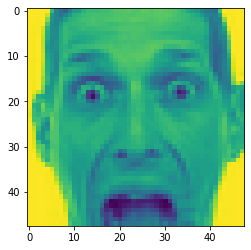

In [7]:
#display reshaped image from dataset
pyplot.imshow(np.array(df.pixels.loc[9].split(' ')).reshape(48,48).astype('float'))

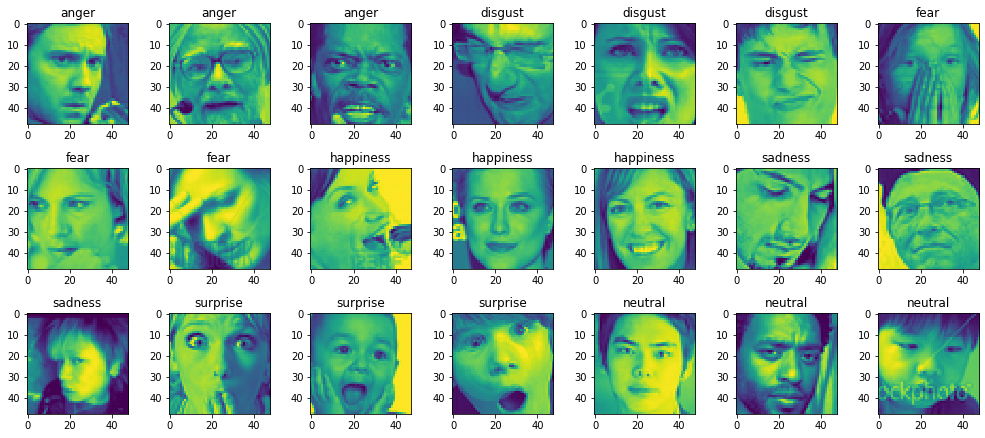

In [8]:
#shows dataset. Images and matching labels.
figures = pyplot.figure(1, (14, 14))
k = 0
for label in sorted(emotions_unique):
    for i in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_title(labelling_emotions_to_text[label])
        pyplot.tight_layout()

In [10]:
#further image data processing
image_data = df.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
image_data = np.stack(image_data, axis=0)
print(image_data.shape)

(35887, 48, 48, 1)


In [11]:
#classification labels
labels_emotions = df.emotion.values

In [12]:
#dividing the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(image_data, labels_emotions, test_size = .1)

In [13]:
#viewing the shape of data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(32298, 48, 48, 1) (32298,) (3589, 48, 48, 1) (3589,)


In [14]:
#further dividing the data into training and testing datasets
x_train = x_train/255
x_test = x_test/255

In [15]:
#building the model
model = Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape = (48,48,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),input_shape = (48,48,1)))
model.add(layers.MaxPool2D(2,2),)
model.add(layers.Conv2D(128,(3,3),input_shape = (48,48,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(256,(3,3), input_shape = (48,48,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1000))
model.add(layers.Dense(7,activation = 'softmax'))


In [19]:
#displays the information about the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [17]:
#compiling the model
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
#using ModelCheckpoint to save the best version of the model during 'history'
checkpoint = ModelCheckpoint("best_model_FER.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', period=1, save_weights_only=False)
#fitting the model
history = model.fit(x_train, y_train, epochs=20, validation_split=.2, callbacks=[checkpoint])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
808/808 [==============================] - ETA: 0s - loss: 1.5188 - accuracy: 0.4075WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002172987D1E0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

In [26]:
test_loss, test_accuracy = saved_model.evaluate(x_test, y_test, verbose=2)
print('Model accuracy: ',test_accuracy)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
113/113 - 4s - loss: 1.2971 - accuracy: 0.5422 - 4s/epoch - 37ms/step
Model accuracy:  0.5422123074531555


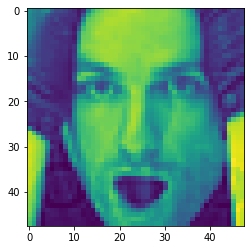

actual label: neutral
predicted label: neutral


KeyboardInterrupt: 

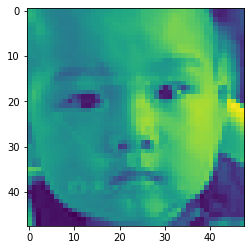

In [22]:
#using saved model to do predictions on test images.
saved_model = tf.keras.models.load_model("best_model_FER.hdf5")
for i in range(10):
    print(f'actual label: {labelling_emotions_to_text[y_test[i]]}')
    predictions = saved_model.predict(tf.expand_dims(x_test[i],0)).argmax()
    print(f'predicted label: {labelling_emotions_to_text[predictions]}')
    pyplot.imshow(x_test[i].reshape((48,48)))
    time.sleep(5)
    clear_output()
    pyplot.show()
    